In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/roberta/keras/roberta_base_en/2/config.json
/kaggle/input/roberta/keras/roberta_base_en/2/tokenizer.json
/kaggle/input/roberta/keras/roberta_base_en/2/metadata.json
/kaggle/input/roberta/keras/roberta_base_en/2/model.weights.h5
/kaggle/input/roberta/keras/roberta_base_en/2/assets/tokenizer/merges.txt
/kaggle/input/roberta/keras/roberta_base_en/2/assets/tokenizer/vocabulary.json
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# set a stylesheet
plt.style.use('ggplot')

# natural language toolkit
import nltk

In [3]:
# read in the data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [4]:
# there is a lot of data, shape it down a bit
df = df.head(500)

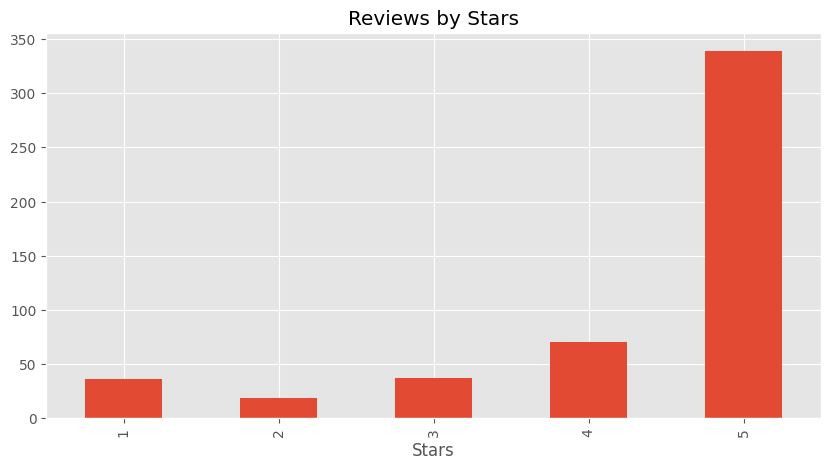

In [5]:
plot = df['Score'].value_counts().sort_index().plot(kind='bar', title='Reviews by Stars', figsize=(10,5))
plot.set_xlabel('Stars')
plt.show()

In [6]:
test_ex = df['Text'][50]
print(test_ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
# nltk can split the data into parts and tokenize it
tokens = nltk.word_tokenize(test_ex)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [8]:
# these identify what part of speech each word is
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [9]:
# groups into chunks of text
chunks = nltk.chunk.ne_chunk(tagged)
chunks.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [10]:
# Sentiment Analysis

Sentiment Analysis

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment_analyzer = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
# compound values are from -1 to 1 showing the overall positivity or negativity of the statement
sentiment_analyzer.polarity_scores('I am angry!')

{'neg': 0.782, 'neu': 0.218, 'pos': 0.0, 'compound': -0.5562}

In [13]:
sentiment_analyzer.polarity_scores('I am happier than ever!')

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5707}

In [14]:
sentiment_analyzer.polarity_scores(test_ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [15]:
# run polarity scores on the whole dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sentiment_analyzer.polarity_scores(text)
    print(res[myid])

  0%|          | 0/500 [00:00<?, ?it/s]

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
{'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027}
{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}
{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}
{'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}
{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}
{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}
{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}
{'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}
{'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}
{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.5719}
{'neg': 0.097, 'neu

In [16]:
# .T is able to transpose the data that we have
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
## PLOT RESULTS

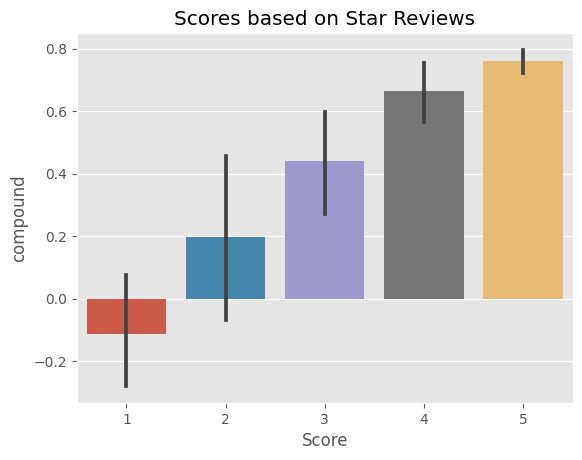

In [18]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Scores based on Star Reviews')
plt.show()

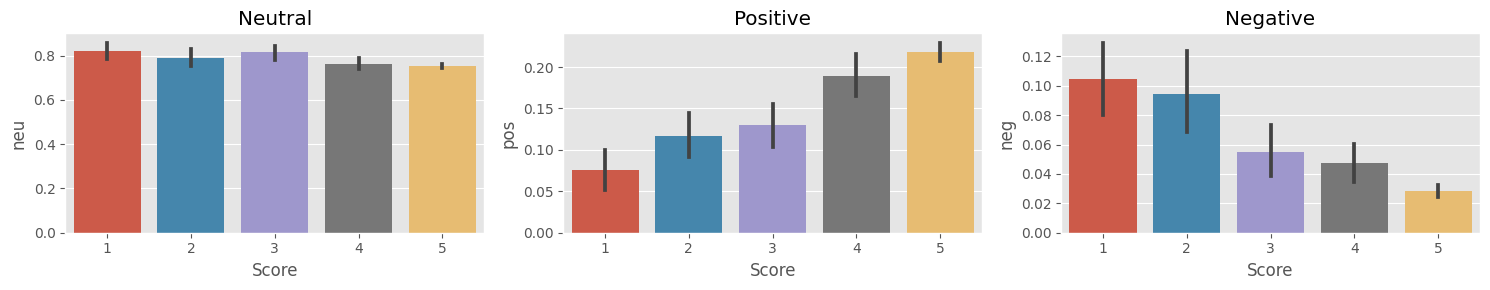

In [19]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders, x='Score',y='neu',ax=axs[0])
sns.barplot(data=vaders, x='Score',y='pos',ax=axs[1])
sns.barplot(data=vaders, x='Score',y='neg',ax=axs[2])
axs[0].set_title('Neutral')
axs[1].set_title('Positive')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [20]:
# now lets change the scoring to base off of context of the words around it
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
# this is transfer learning from another base model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [22]:
example_encoded = tokenizer(test_ex, return_tensors='pt')
output = model(**example_encoded)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573678}


In [23]:
def polarity_scores_roberta(example):
    example_encoded = tokenizer(example, return_tensors='pt')
    output = model(**example_encoded)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        id = row['Id']
        vader_result = sentiment_analyzer.polarity_scores(text)
        vader_result_renamed = {}

        roberta_result = polarity_scores_roberta(text)
        roberta_result_renamed = {}

        for key, value in vader_result.items():
            vader_result_renamed[f"vader_{key}"] = value
        for key, value in roberta_result.items():
            roberta_result_renamed[f"roberta_{key}"] = value
        # combine both the vader and roberta results
        combined = {**vader_result_renamed, **roberta_result_renamed}
        res[id] = combined
    except RuntimeError:
        print(f'Broke for id {id}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [25]:
# res

In [26]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns={'index':'Id'})
results = results.merge(df, how = 'left')
results.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_roberta_neg', 'roberta_roberta_neu', 'roberta_roberta_pos',
       'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

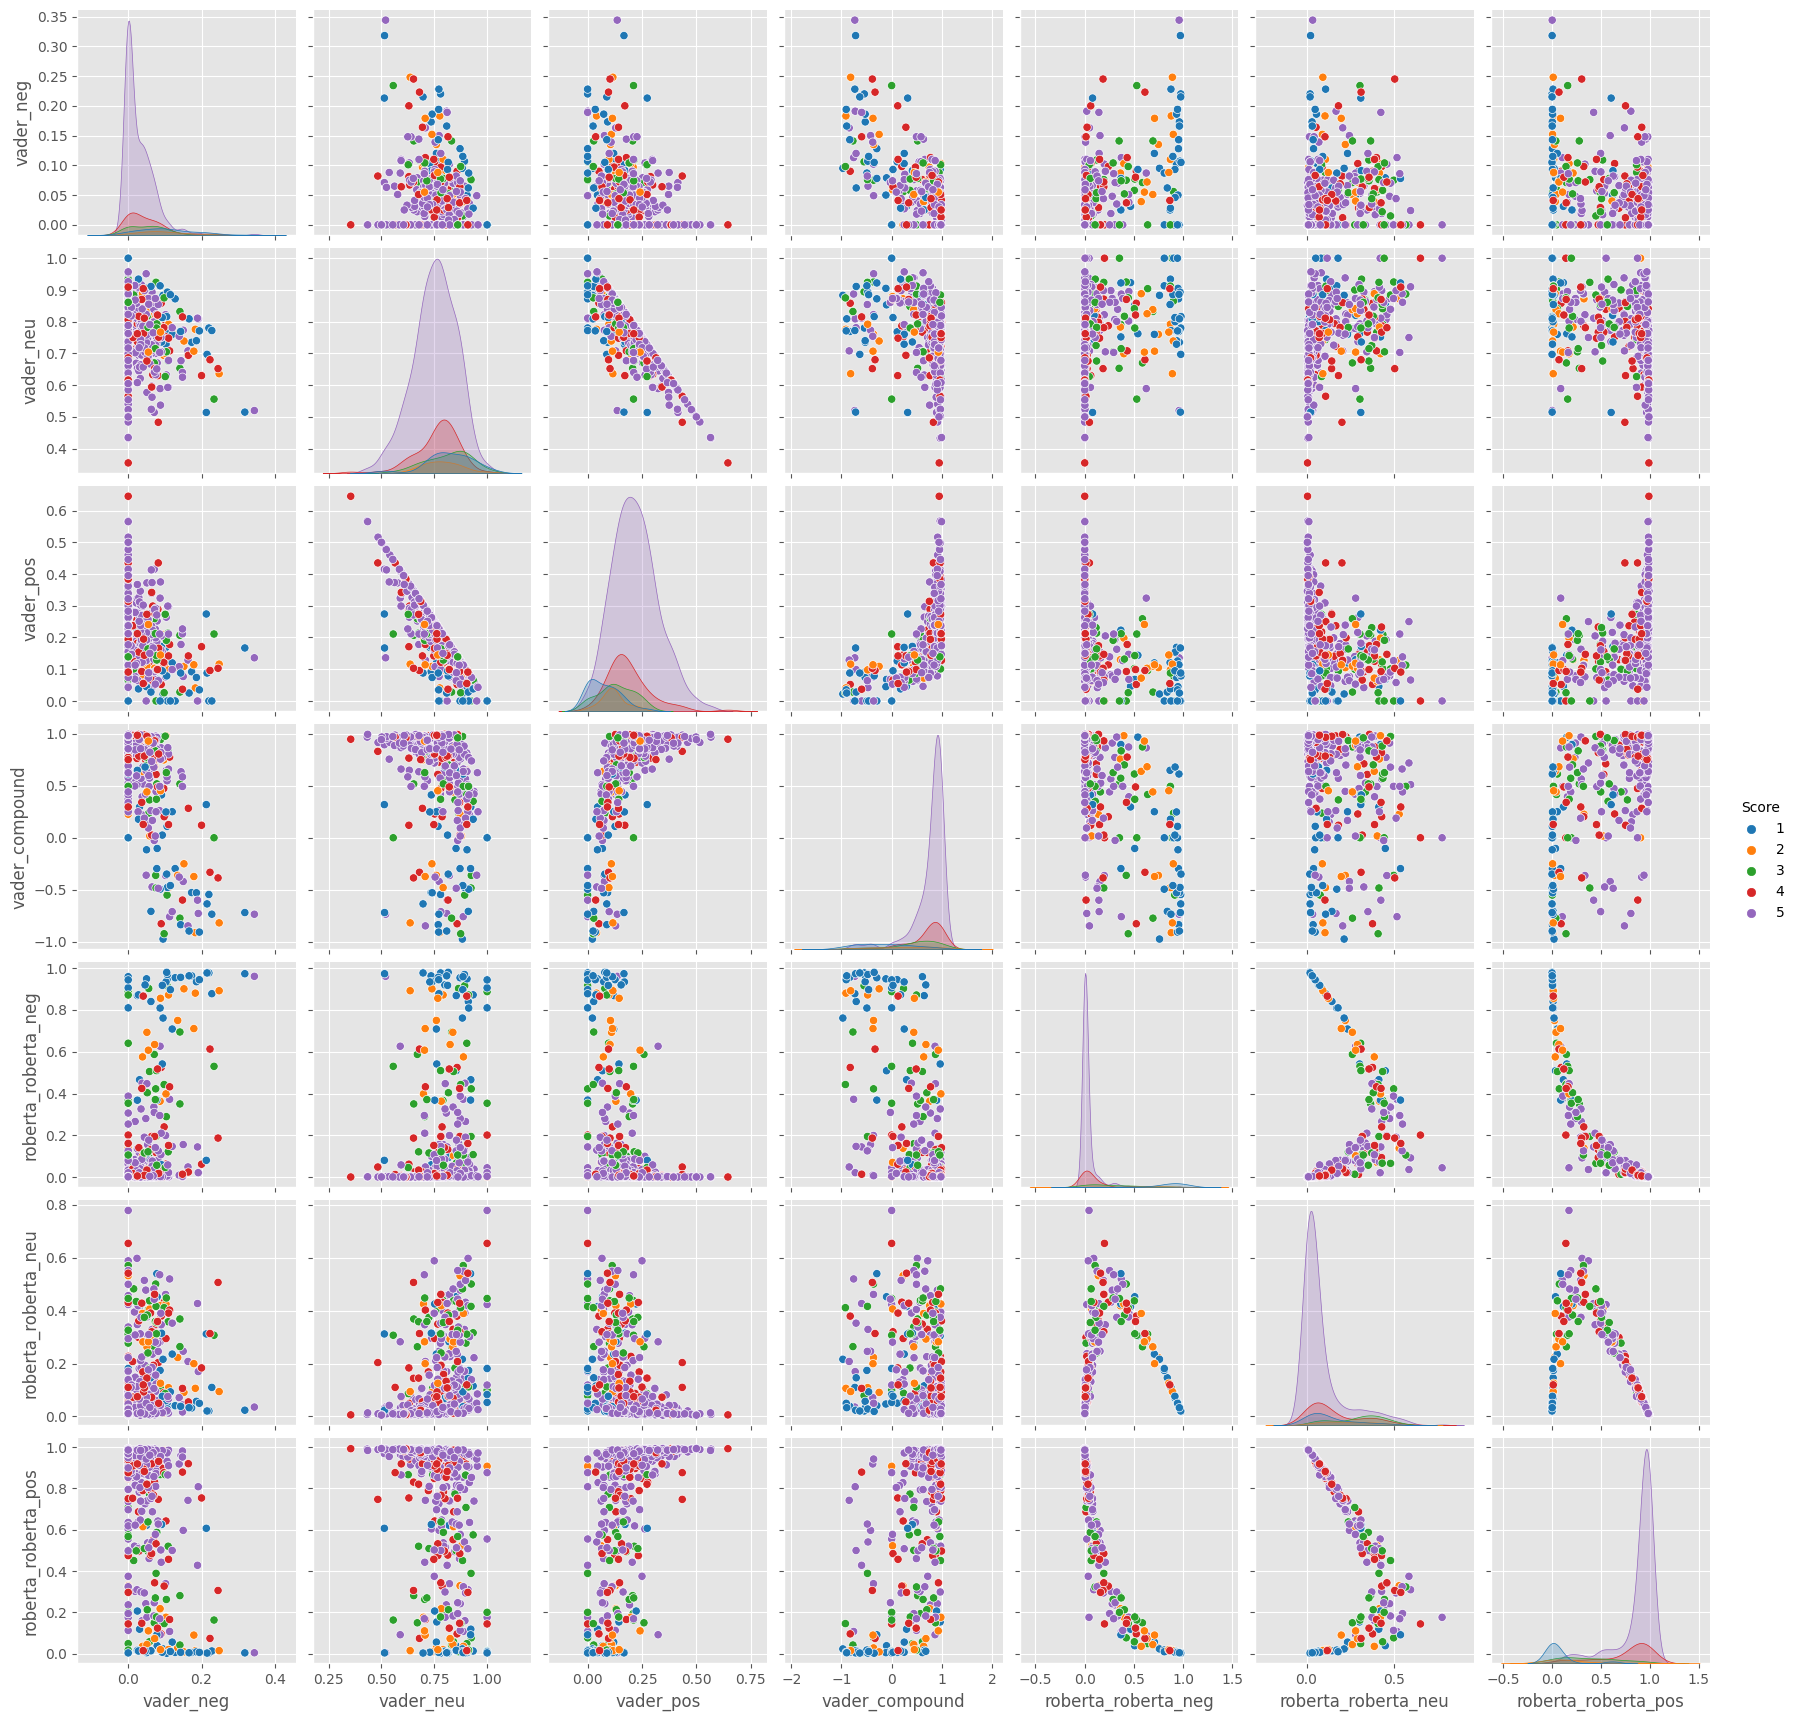

In [27]:
sns.pairplot(data=results, vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_roberta_neg', 'roberta_roberta_neu', 'roberta_roberta_pos'], hue='Score', palette='tab10')
plt.show()